In [5]:
install.packages(c("survival", "survminer"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’




In [16]:
library(readr)
library(survival)
library(survminer)
library(dplyr)

In [20]:
data = read_csv("data6.csv")

data$gioi <- factor(data$gioi, levels = c("Nam", "Nu"))
data$tinh_trang_kinh_te <- factor(data$tinh_trang_kinh_te, levels = c("Ngheo", "Trung Binh", "Cao"), ordered = TRUE)
data$tinh_trang_nha_o <- factor(data$tinh_trang_nha_o, levels = c("Song mot minh", "Song voi nguoi than", "Khac"))
data$mac_benh_khac <- factor(data$mac_benh_khac, levels = c("Khong", "Co"))
data$ho_tro_phuc_hoi_CN <- factor(data$ho_tro_phuc_hoi_CN, levels = c("Khong", "Co"))
data$bien_chung_som <- factor(data$bien_chung_som, levels = c("Khong", "Co"))
data$trang_thai_su_kien <- as.numeric(as.character(data$trang_thai_su_kien))

str(data)

Rows: 1600 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gioi, tinh_trang_kinh_te, tinh_trang_nha_o, mac_benh_khac, ho_tro_p...
dbl (7): id, tuoi, thoi_gian_nam_vien, chi_so_dinh_duong, so_lan_tai_kham, t...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [1,600 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id                : num [1:1600] 1 2 3 4 5 6 7 8 9 10 ...
 $ tuoi              : num [1:1600] 87 75 85 81 64 71 74 68 64 65 ...
 $ gioi              : Factor w/ 2 levels "Nam","Nu": 1 2 2 1 2 2 1 1 2 1 ...
 $ tinh_trang_kinh_te: Ord.factor w/ 3 levels "Ngheo"<"Trung Binh"<..: 2 2 3 2 2 2 1 2 1 2 ...
 $ tinh_trang_nha_o  : Factor w/ 3 levels "Song mot minh",..: 2 2 2 2 3 2 3 2 2 2 ...
 $ mac_benh_khac     : Factor w/ 2 levels "Khong","Co": 1 1 1 1 2 1 1 1 1 2 ...
 $ thoi_gian_nam_vien: num [1:1600] 3 5 10 7 6 9 5 3 9 11 ...
 $ ho_tro_phuc_hoi_CN: Factor w/ 2 levels "Khong","Co": 1 1 1 2 2 2 2 2 1 2 ...
 $ chi_so_dinh_duong : num [1:1600] 8.1 10 5.9 7.6 4.6 6.3 6.1 7.6 3.2 5.8 ...
 $ so_lan_tai_kham   : num [1:1600] 1 1 1 1 4 3 2 2 0 5 ...
 $ bien_chung_som    : Factor w/ 2 levels "Khong","Co": 2 1 1 1 1 1 1 1 2 1 ...
 $ thoi_gian_phuc_hoi: num [1:1600] 6.57 12 0.07 12 12 1.72 7.38 8.77 12 1.67 ...
 $ trang_thai_su_kien: nu

Ignoring unknown labels:
• fill : "Strata"
Ignoring unknown labels:
• fill : "Strata"
Ignoring unknown labels:
• fill : "Strata"
Ignoring unknown labels:
• fill : "Strata"
Ignoring unknown labels:
• colour : "Strata"


Call: survfit(formula = Surv(data$thoi_gian_phuc_hoi, data$trang_thai_su_kien) ~ 
    1, data = data)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    6    808     676    0.558  0.0128        0.534        0.584
   12    449     308    0.337  0.0125        0.313        0.362

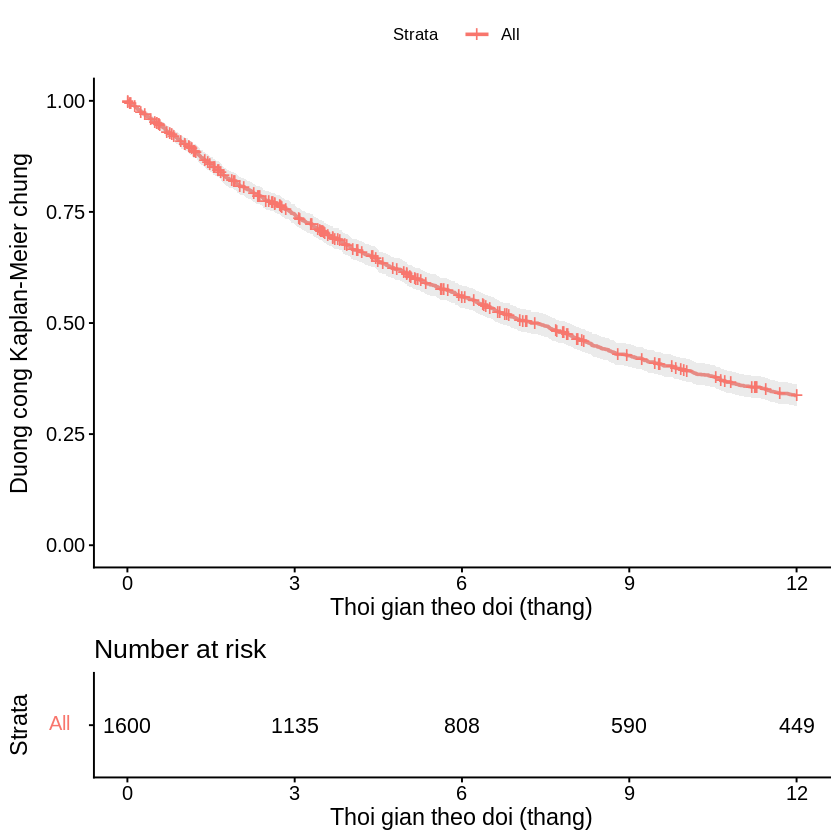

In [23]:
# ---------------------------
# 1. Đường cong sống Kaplan-Meier chung và theo nhóm
# ---------------------------

#kaplan-meier chung
km_all <- survfit(Surv(data$thoi_gian_phuc_hoi, data$trang_thai_su_kien) ~ 1, data = data)
ggsurvplot(km_all,
           data = data,
           conf.int = TRUE,
           risk.table = TRUE,
           xlab = "Thoi gian theo doi (thang)",
           ylab = "Xac xuat chua phuc hoi",
           title = "Duong cong Kaplan–Meier tổng thể")

# Ước tính tại 6 và 12 tháng
summary(km_all, times=c(6,12))

#Kaplan-Meier theo giới
km_sex <- survfit(Surv(data$$thoi_gian_phuc_hoi, data$trang_thai_su_kien) ~ gioi, data = data)
ggsurvplot(km_sex,
           data = data,
           conf.int = TRUE,
           risk.table = TRUE,
           xlab = "Thoi gian theo doi (thang)",
           ylab = "Duong cong Kaplan-Meier chung")





